### 통신시스템 설계 및 실습
#### 2024년도 1학기

### DTMF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from numpy.random import normal, randint, choice

In [2]:
from my_dtmf import *

In [12]:
dir (sd)

['AsioSettings',
 'CallbackAbort',
 'CallbackFlags',
 'CallbackStop',
 'CoreAudioSettings',
 'DeviceList',
 'InputStream',
 'OutputStream',
 'PortAudioError',
 'RawInputStream',
 'RawOutputStream',
 'RawStream',
 'Stream',
 'WasapiSettings',
 '_CallbackContext',
 '_InputOutputPair',
 '_StreamBase',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_array',
 '_atexit',
 '_buffer',
 '_check',
 '_check_dtype',
 '_check_mapping',
 '_exit_handler',
 '_ffi',
 '_find_library',
 '_get_device_id',
 '_get_stream_parameters',
 '_initialize',
 '_initialized',
 '_last_callback',
 '_lib',
 '_libname',
 '_os',
 '_platform',
 '_remove_self',
 '_sampleformats',
 '_sounddevice_data',
 '_split',
 '_sys',
 '_terminate',
 '_wrap_callback',
 'check_input_settings',
 'check_output_settings',
 'default',
 'get_portaudio_version',
 'get_status',
 'get_stream',
 'play',
 'playrec',
 'query_devices',
 'query_hostapis',
 'rec',
 'sl

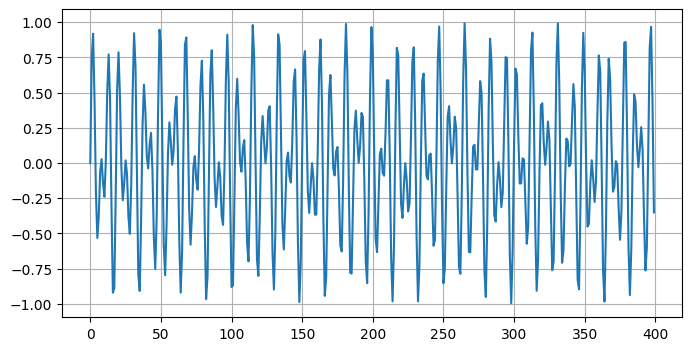

In [10]:
'''
DTMF dignal generation
'''

x = dtmf_gen('8', 50)
plt.figure(figsize=(8, 4))
plt.plot(x)
plt.grid()
plt.show()

In [14]:
'''
sounddevice module: play, rec, stop, sleep, ... 소리나는거
'''

x = dtmf_gen('1', 1000)
sd.play(x, blocking=False) # blocking vs non-blocking(재생시 바로 나타남)
print('play completed!')

play completed!


In [15]:
for c in DTMF_KEYS:
    print(f'{c}', end=' ')
    x = dtmf_gen(c, 300)
    sd.play(x, blocking=False)
    sd.sleep(400)

1 2 3 4 5 6 7 8 9 * 0 # 

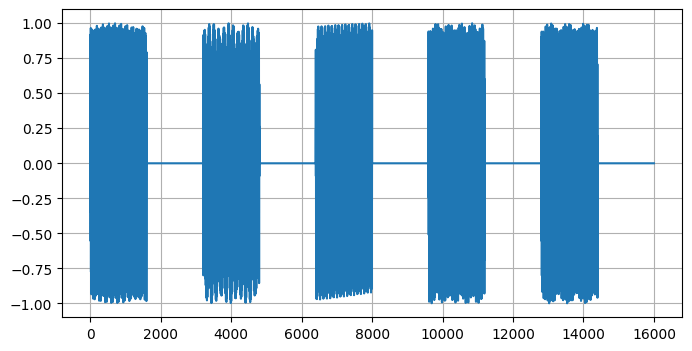

In [16]:
ss = '12345'
T = 200, 200 # msec 신호 길이, 신호와 신호 간

x = digits_gen(ss, *T)
plt.figure(figsize=(8, 4))
plt.plot(x)
plt.grid()
plt.show()

sd.play(x/4)

In [17]:
'''
GUI programming
'''

import tkinter as tk

def dt_play(event):
    T = 400, 200
    ss = e0.get()
    x = digits_gen(ss, T[0], T[1])
    sd.play(x)

def dt_stop(event):
    sd.stop()

mw = tk.Tk()
l0 = tk.Label(mw, text='DTMF Player')
e0 = tk.Entry(mw)
b0 = tk.Button(mw, text='Play')
b0.bind('<ButtonRelease-1>', dt_play)
b1 = tk.Button(mw, text='Stop')
b1.bind('<ButtonRelease-1>', dt_stop)

l0.pack()
e0.pack()
b0.pack(fill='x')
b1.pack(fill='x')

tk.mainloop()

In [18]:
'''
DTMF signal generation (GUI)
'''

import tkinter as tk

def wrapper(c, T):
    def dtmf_play(args):
        x = dtmf_gen(c, T)
        sd.play(x)
    
    return dtmf_play

def dtmf_stop(event):
    sd.stop()
        
mw = tk.Frame(bd=2, relief='ridge')
t = tk.Label(mw, text='DTMF KEYPAD', fg='blue')
t.grid(columnspan=3)

for i, c in enumerate(DTMF_KEYS):
    b = tk.Button(mw, text=c, width=5)
    b.bind('<Button-1>', wrapper(c, 2000))
    b.bind('<ButtonRelease-1>', dtmf_stop)
    m, n = divmod(i, 3)
    b.grid(row=1+m, column=n)

mw.pack()
tk.mainloop()

#### DTMF frequency component detection

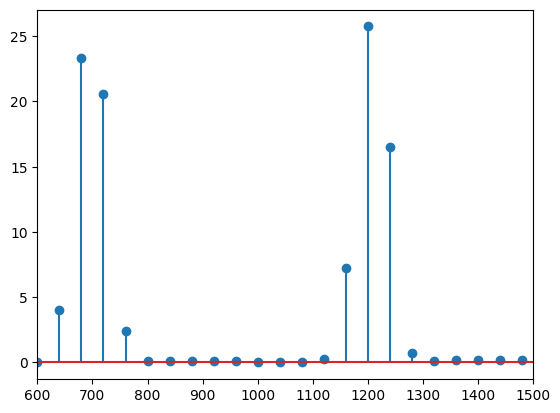

In [19]:
from scipy.fftpack import fft, fftshift

x = dtmf_gen('1', 25)
x *= np.hamming(len(x))
X = fft(x)
f = np.linspace(-FS/2, FS/2, len(X), endpoint=False)

plt.stem(f, fftshift(abs(X)))
plt.xlim([600, 1500])
plt.show()

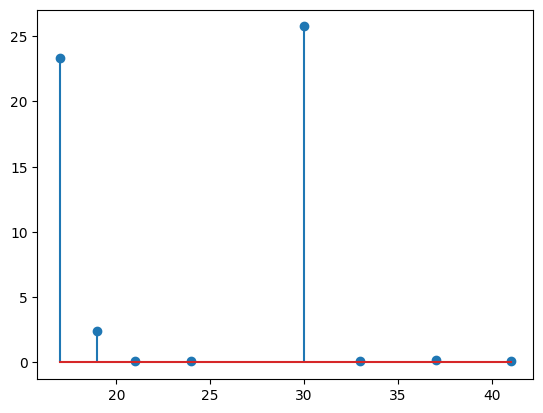

  k   :    FFT,    MGZ(int)  MGZ(float)
17.43 :   544.46,   544.46,   720.87
19.25 :     5.75,     5.75,     0.36
21.30 :     0.01,     0.01,     0.01
23.52 :     0.01,     0.01,     0.02
30.23 :   662.72,   662.72,   719.21
33.40 :     0.01,     0.01,     0.00
36.92 :     0.03,     0.03,     0.04
40.83 :     0.02,     0.02,     0.02


In [20]:
N = 200 # 25 msec
df = FS / N
ff = DTMF_FREQ.reshape(-1)
kk = ff / df
ki = np.int_(np.round(kk))
Xk = abs(X[ki])
plt.stem(ki, Xk)
plt.show()

print('  k   :    FFT,    MGZ(int)  MGZ(float)')
for k in kk:
    print(f'{k:.2f} : {abs(X[round(k)])**2:8.2f}, {mgz(x, round(k)):8.2f}, {mgz(x, k):8.2f}')

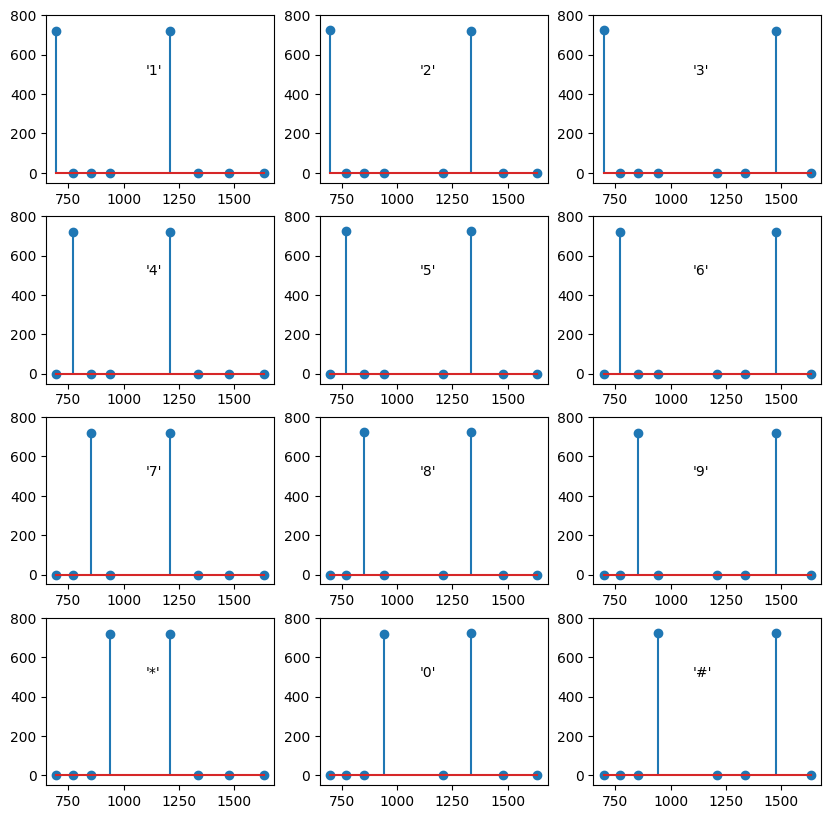

In [21]:
'''
DTMF frequency component detection 개별 성분 9하기 detection 개별 성분 9하기
'''

T = 25 # msec
N = FS * T / 1000
ff = DTMF_FREQ.reshape(-1)
kf = ff / (FS / N)
ki = np.round(kf)
xp = np.zeros(len(ff))

plt.figure(figsize=(10,10))
for i, c in enumerate(DTMF_KEYS):
    x = dtmf_gen(c, T)
    x *= np.hamming(len(x))
    xp = [mgz(x, k) for k in kf]
    plt.subplot(4, 3, i+1)
    plt.stem(ff, xp)
    plt.ylim([-50, 800])
    plt.text(1100, 500, f"'{c}'")
plt.show()

In [ ]:
x = [1,3,2,7]
np.max(x)


In [3]:
'''
Simple DTMF digit detection 
sampli g
'''

def simple_det(x): # 일반적인 비교
    ff = DTMF_FREQ.reshape(-1)
    kf = ff / FS * len(x)
    xp = np.array([mgz(x, k) for k in kf]).reshape(2, -1)
    ir, ic = xp.argmax(-1)
    return DTMF_KEYS[ir*3 + ic] if xp.sum() > 100 and ic != 3 else INVLD

N = 200
T = N / FS * 1000

dd = ""
for c in DTMF_KEYS:
    x = dtmf_gen(c, T)
    dd += simple_det(x)
print(f'detected digits = {dd}, (simple detection)')

dd = ""
for c in DTMF_KEYS:
    x = dtmf_gen(c, T)
    dd += dtmf_det(x)
print(f'detected digits = {dd}, (DTMF detection)')

d = [simple_det(normal(scale=1, size=N)) for i in range(20)] # 잡음 중에 뭐가 그건지
print('detected noise =', '|'.join(d), '(simple detection)')

d = [dtmf_det(normal(scale=1, size=N)) for i in range(20)] # DTMF 신호를 골라내기
print('detected noise =', '|'.join(d), '(DTMF detection)')

detected digits = 123456789*0#, (simple detection)
detected digits = 123456789*0#, (DTMF detection)
detected noise = x|x|#|x|5|*|*|0|6|9|x|3|9|9|4|x|2|5|0|4 (simple detection)
detected noise = x|x|x|x|x|x|x|x|x|x|x|x|x|x|x|x|x|x|x|x (DTMF detection)


In [4]:
660/25

26.4

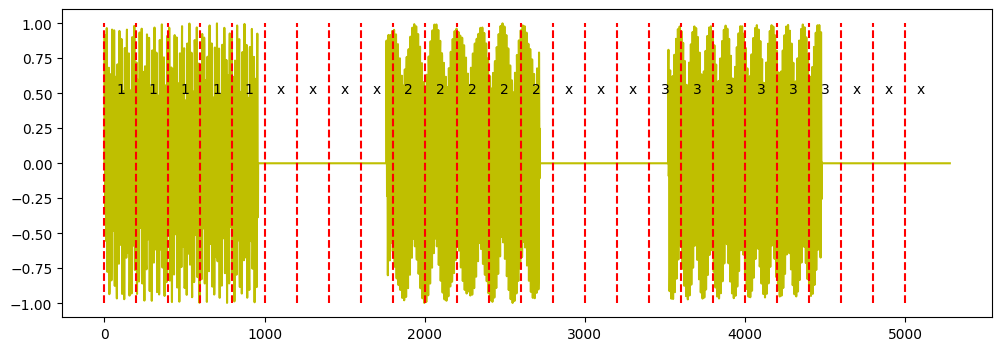

In [5]:
s = '123'
n_len, n_sep = 120, 100 # ms
x = digits_gen(s, n_len, n_sep)
M = len(x) // NFRM # number of blocks 블록 개수 여기서는 26

plt.figure(figsize=(12, 4))
plt.plot(x, 'y')
d = [dtmf_det(x[i*NFRM:(i+1)*NFRM]) for i in range(M)]
for i in range(M):
    plt.plot([i*NFRM, i*NFRM], [-1, 1], '--r')
    plt.text(NFRM//2 + i*NFRM, .5, d[i], ha='center', c='k')
plt.show()

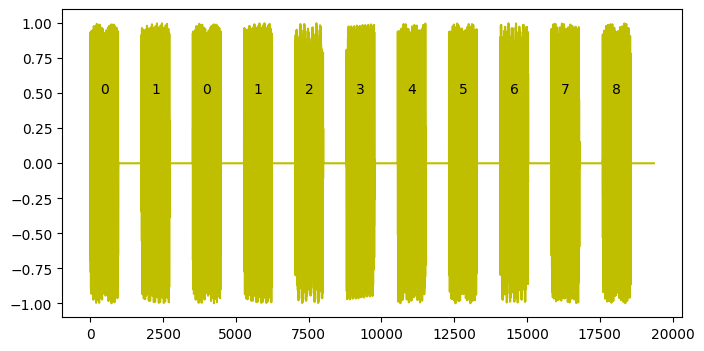

In [6]:
s = '010-1234-5678'
n_len, n_sep = 120, 100 # ms
x = digits_gen(s, n_len, n_sep) # 문자에 해당되지 않는 건 빼버

plt.figure(figsize=(8, 4))
plt.plot(x, 'y')
d = dtmf_dec(x)
for i in range(len(d)):
    plt.text(n_len*4 + i*(n_len+n_sep)*8, .5, d[i], ha='center', c='k')
plt.show()

In [7]:
'''
DTMF signal decoding (GUI)
'''

import tkinter as tk

dd = [INVLD] * 3

def cbf(x, frames, time, status):
    global dd
    
    if status:
        print(status)
    dd[0] = dd[1]
    dd[1] = dd[2]
    dd[2] = dtmf_det(x)
    if dd[0] == INVLD and dd[1] != INVLD and dd[2] == dd[1]:
        t1['text'] = t1['text'][-11:] + dd[2]
    
df = tk.Frame(bd=2, relief='flat')
t0 = tk.Label(df, text='DTMF Decoding', relief='raised', fg='blue', font=(None,12))
t1 = tk.Label(df, anchor=tk.W, relief='sunken', bg='white', width=15, font=(None,12))
bq = tk.Button(df, text='Quit', relief='groove', font=(None, 12), command=df.master.destroy)

t0.grid(sticky=tk.W+tk.E, padx=1, pady=1)
t1.grid(sticky=tk.W+tk.E, padx=1, pady=1)
bq.grid(sticky=tk.W+tk.E, padx=1, pady=1)

df.pack()
with sd.InputStream(callback=cbf):
    tk.mainloop()

PortAudioError: Error querying device -1

In [8]:
'''
DTMF decoding precision and recall test
- 2020/06/16, 2023
'''

def ptest(snr_db, N, ratio):
    '''
    recall and precision test, 0 < ratio < 1
    '''
    
    snr = 10 ** (snr_db / 10)
    cnt = [0, 0]
    for i in range(N):
        x = dtmf_gen(DTMF_KEYS[randint(len(DTMF_KEYS))], 25) # signal, Px = 1/4
        n = normal(size=len(x)) # noise, Pn = 1
        if dtmf_det(x + np.sqrt(1/4/snr) * n, ratio) != INVLD:
            cnt[0] += 1
        if dtmf_det(n, ratio) != INVLD:
            cnt[1] += 1
    
    recall = cnt[0] / N
    prec = cnt[0] / (cnt[0] + cnt[1]) if cnt[0] + cnt[1] else np.nan
    return recall, prec

def plot_ptest(ratio, snr_db=15, N=1000):
    '''
    plot recall and precision as a function of ratio
    '''
    
    rp = []
    for r in ratio:
        rp.append(ptest(snr_db, N, r))
    plt.plot(ratio, rp, 'o--')
    plt.grid()
    plt.legend(['recall', 'precision'])
    plt.show()

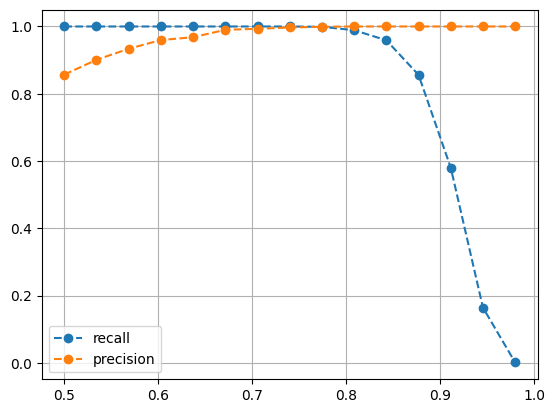

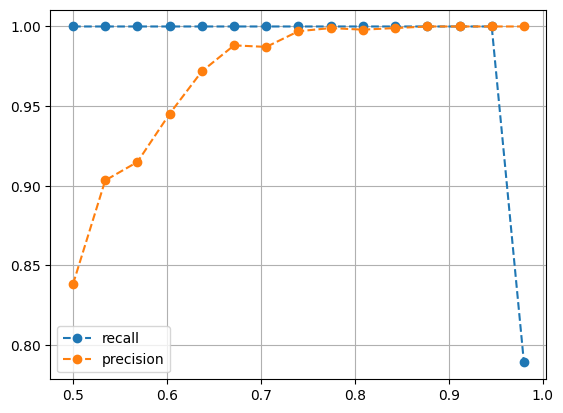

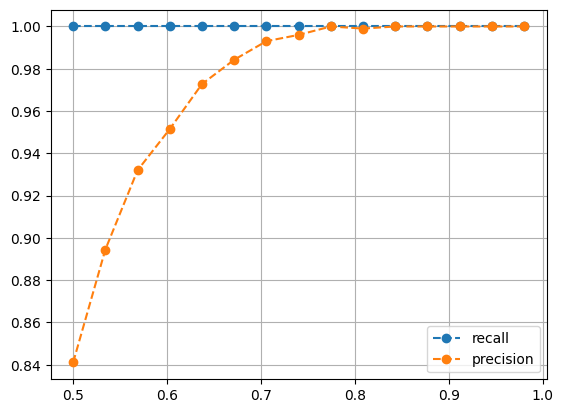

In [10]:
plot_ptest(np.linspace(.5, .98, 15), snr_db=0)
plot_ptest(np.linspace(.5, .98, 15), snr_db=15)
plot_ptest(np.linspace(.5, .98, 15), snr_db=100)

In [11]:
'''
DTMF signal decoding test
- 2020/06/23, 2023
'''

def prob_succ(snr_db, N, m=10):
    snr = 10 ** (snr_db / 10)
    Ps = 1/4
    Pn = Ps/snr
    
    succ = 0
    for i in range(N):
        s = ''.join(choice(list(DTMF_KEYS), m))
        x = digits_gen(s, 100, 100)
        x += normal(scale=np.sqrt(Pn), size=len(x))
        d = dtmf_dec(x)
        if d == s:
            succ += 1
    return succ / N

In [12]:
prob_succ(0, 100)

1.0